# Assignment 1
**Returned by**: my name, my student number

***
Alltogether this assignment is worth of 27 points and consists of 7 questions:
* [Question 1 (2P.)](#q1)
* [Question 2 (8P.)](#q2)
* [Question 3 (2P.)](#q3)
* [Question 4 (3P.)](#q4) 
* [Question 5 (3P.)](#q5) 
* [Question 6 (6P.)](#q6)
* [Question 7 (3P.)](#q7)

These are the most commonly used modules you will need. Please **do not add** other libraries/modules without consulting course TAs first.

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from scipy.fft import fft,fftshift
from scipy.signal import butter, freqz, filtfilt, lfilter
from scipy.signal import periodogram
# these make grading easier, you can disable them while debugging
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

***
## Question 1 (2P.)<a id='q1'></a>
Create a DFT matrix 
\begin{matrix} \mathbf{A} = 
\begin{pmatrix}
    a_{11} & a_{12} & a_{13} & a_{14} \\
    a_{21} & a_{22} & a_{23} & a_{24} \\
    a_{31} & a_{32} & a_{33} & a_{34} \\
    a_{41} & a_{42} & a_{43} & a_{44} \\
\end{pmatrix}
\in \mathbb{C}^{4 \times 4},
\end{matrix}

where the $ij$th element ($i$th row, $j$th column) is $a_{ij} = \exp(-2\jmath \pi (i-1) (j-1) / N)$. Here, $\jmath$ is the imaginary unit and $N$ is the length of $\mathbf{x}$. The DFT $\mathbf y$ of $\mathbf x = [5,2,1,1]^\top$ is then given by the matrix-vector product $\mathbf y = \mathbf{A}\mathbf{x}$.

Store the DFT matrix to `A` and verify that `y1=A@x` and `y2=fft(x)` give the same result for the vector `x = np.array([5, 2, 1, 1])`.

**Hint:**
- Create vectors `k` and `n` using `np.arange` and compute their outer product $\mathbf{k} \otimes \mathbf{n} = \mathbf{k} \mathbf{n}^\top$ using `np.outer`. Then apply the given formula for $a_{ij}$ (to the matrix obtained by the outer product of `k` and `n`) using `np.exp`, `N`, and `pi`.

In [2]:
# create x (replace ___ with your code)
x = np.array([5, 2, 1, 1])

# compute the length of x
N = len(x)

# create vectors k and n using np.arange
k = np.arange(4)  # frequency index
n = np.arange(4)   # time index

# compute DFT matrix
A = np.exp(-2*1j*pi*(k)*np.outer(k,n)/N)

# verify the result
X1 = A@x
print(X1)
X2 = fft(x)
print(X2)

[9.+0.j 6.-3.j 3.-0.j 6.+3.j]
[9.-0.j 4.-1.j 3.-0.j 4.+1.j]


***
## Question 2 (8P.)<a id='q2'></a>
Load the audio recording, `Piano.mf.A4.aiff`, of the piano note to Python using the codes shown below.

In [3]:
# Please don't add other libraries without consulting course TAs first.
import aifc
import soundfile as sf
#import sounddevice as sd

In [4]:
# read sound file and sampling frequency
x_A4,fs = sf.read('Piano.mf.A4.aiff')
# select left channel
x_A4 = x_A4[:,0]
# play the sound
#sd.play(x_A4,fs)

### Question 2a (1P.)
* Calculate the time vector `t`, which contains the sampling instants of the recording. For computing `t` you need the length `N` of the signal and the sampling frequency `fs` as well as the function `np.arange`. The starting and ending times should be `t[0] == 0` and `t[-1] == (N-1)/fs`.

* Make a plot of the **first 3 seconds** of the signal `x_A4` as a function of time `t`.
* Add x label 'Time (secs)' and y label 'Amplitude' using `plt.xlabel` and `plt.ylabel`. To adjust the fontsize add the argument `fontsize=18`.

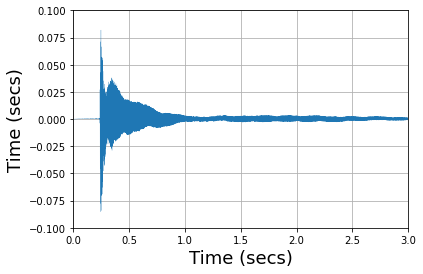

In [5]:
# replace ___ with your code

# compute length of signal
N = len(x_A4)


# compute time vector
t = np.arange(0, N/fs, 1/fs)

# plot the signal
plt.plot(t,x_A4,linewidth=0.2)

# adjust the y-axis to the range [-0.1,0.1]
plt.ylim([-0.1,0.1])

# adjust the x-axis to first 3 seconds
plt.xlim([0.0,3.0])

# add x label
plt.xlabel('Time (secs)', fontsize=18)

# add y label
plt.ylabel('Time (secs)', fontsize=18)

# add grid and adjust size
plt.grid()
plt.rcParams["figure.figsize"] = (12,8)


### Question 2b (1P.)
Compute and plot the PSD estimate of `x_A4` using the function `periodogram`. Set x and y labels and zoom in on the frequencies `[0,4]` kHz.

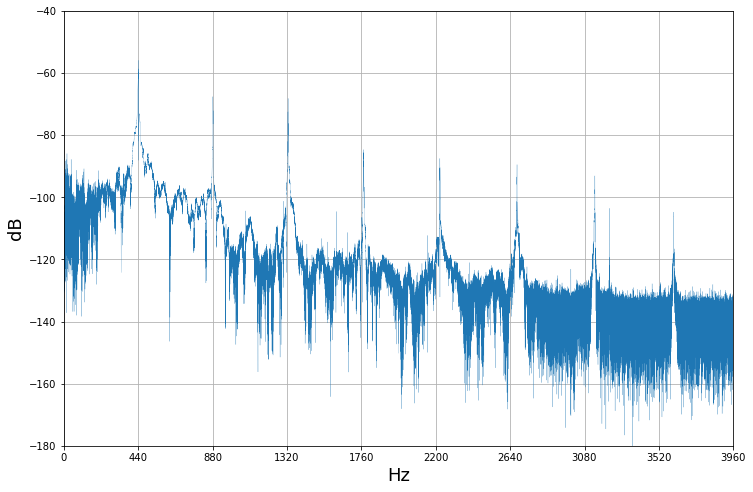

In [6]:
# replace ___ with your code

# compute peridogram (f1 is the frequency vector and the PSD)
f_vec, PSD = periodogram(x_A4, fs)

# compute the PSD in decibels (use np.log10)
PSD_dB = 10*np.log10(PSD)

# plot the PSD estimate
plt.plot(f_vec, PSD_dB, linewidth = 0.2 )

# set x limits
plt.xlim([0,4.0])

# set y limits
plt.ylim(-180,-40)

# add x label 'Hz' with fontsize 18
plt.xlabel('Hz', fontsize=18)

# add y label 'dB' with fontsize 18
plt.ylabel('dB', fontsize=18)

# set x ticks, add grid and adjust size
plt.xticks(np.arange(10)*440)
plt.grid()
plt.rcParams["figure.figsize"] = (8,8)

### Question 2c (1P.)
The FFT is fastest to compute for a signal whose length is a power of 2. A signal of length $N$ can be appended by zeros until the total length is a power of 2. This is known as zero-padding. Zero-padding is a form of interpolation, which doesn't change the frequency resolution of the FFT.

* Compute the FFT length $N_{\mathrm{FFT}}$, which is the smallest power of 2 larger than $N$. *Hint:* you can use `np.ceil` and `np.log2`.
* What is the frequency resolution $\Delta f$?

**Hint**: The frequency resolution of the DFT for an $N$-length signal sampled at the rate $f_s$ can be computed from
$$
	\Delta f = \dfrac{f_s}{N}.
$$
In order to have a good frequency resolution a large number of samples is
required.

In [7]:
# replace ___ with your code

# compute NFFT (int converts the float to integer)
NFFT = int(2**np.ceil(np.log2(N)))

# print out NFFT
print(NFFT)

# compute the frequency resolution
fr = fs/N

# print out fr (round up to 4 decimals)
print(round(fr,4))

2097152
0.0334


### Question 2d (2P.)
Reproduce the periodogram of b)-part using the function `fft`. 

* Specify the FFT window length when using `fft` (use the value $N_{\mathrm{FFT}}$ calculated in problem 2c).

* Compute the periodgram as $\frac{1}{N} |\mathbf{y}|^2$, where $\mathbf{y}$ is the FFT of $\mathbf{x}$ and $|\cdot|^2$ is applied elementwise. Then to get the one-sided periodogram (only positive frequencies), scale it by $2/fs$ (density scaling).

Note that, the first half of the obtained vector will correspond to the positive frequencies (from DC at 0 Hz to the Nyquist frequency) and the second half (from Nyquist frequency to sampling frequency) to the negative frequencies (which you ignore in the one-sided PSD).

**Extra info for understanding the fft:** (source: `help(fft)`)

The frequency term ``f=k/N`` is found at ``y[k]``. At ``y[N/2]`` we reach
the Nyquist frequency and wrap around to the negative-frequency terms. So,
for an 8-point transform, the frequencies of the result are `[0, 1, 2, 3, -4, -3, -2, -1]`. To rearrange the fft output so that the zero-frequency component is centered, like `[-4, -3, -2, -1, 0, 1, 2, 3]`, use `fftshift` (this is not necessary in this exercise).

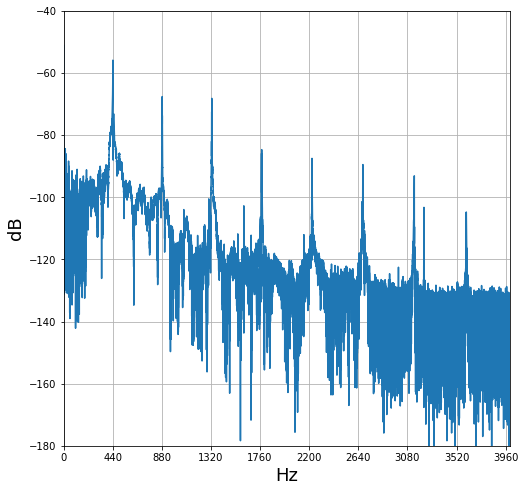

In [8]:
# replace ___ with your code

# compute fft of x_A4. Use length NFFT for the fft.
y_A4 = fft(x_A4,NFFT)

# compute the periodogram. Use variables y_A4, fs, and N (not NFFT)
Per = (1/N)*abs(y_A4)*abs(y_A4)

# scale Per so that it has the density scaling
Per = 2/fs * Per

# convert periodogram in decibels (use np.log10)
Per_dB = 10*np.log10(Per)

# compute frequency vector for plotting. Use np.arange, NFFT and fs
f = np.arange(0, fs, fs/NFFT)

# plot Per_dB
plt.plot(f, Per_dB)

# add labels and limits of axis
plt.xlim([0,4e3])
plt.ylim([-180,-40])
plt.xlabel('Hz', fontsize=18)
plt.ylabel('dB', fontsize=18)
plt.xticks(np.arange(10)*440)
plt.grid()
plt.rcParams["figure.figsize"] = (8,8)

### Question 2e (1P.)
The highest peak (excluding DC at 0 Hz) in the PSD estimate corresponds to the fundamental frequency of the note played. 
* What is the fundamental frequency $f_1$ of the note in `x_A4`.
* Calculate the error in fundamental frequency. The note $A_4$ should theoretically be 440Hz (according to ISO 16 standard).

**Sidenote:** The human ear is very good at differentiating small frequency differences in the Hz range. A well trained ear can detect differences in the order of 0.1%

In [9]:
# compute the index of the highest peak in periodogram Per. Use np.argmax.
idx = np.argmax(Per[1:])

# the corresponding fundamental frequency
f1 = f[idx]

# print out f1
print('Largest peak: {:.2f}'.format(f1))

# compute the absolute difference of 440 Hz and the note of the piano
err_f1 = abs(f1-440)

# compute error in percentage at most
err_f1_percentage = err_f1/440*100
print('Error: {:.2f} Hz and {:.2f}%'.format(err_f1,err_f1_percentage))

Largest peak: 440.55
Error: 0.55 Hz and 0.12%


### Question 2f (2P.)
The fundamental frequency is called the *first harmonic* $f_1$ (sometimes  denoted by $f_0$). The (theoretical) fifth harmonic is then $f_5 = 5 \cdot f_1$. Inharmonicity, means that the overtones ($f_2,f_3,\ldots$) are not exact multiples of the fundamental frequency. String instruments, such as the piano, have some degree of inharmonicity.

* Find the empirical frequency of the fifth harmonic of the piano sound in `x_A4`. Inspect the PSD (variable `Per` or `Per_dB`) either visually (by zooming) or find it by coding.
* How much does the observed fifth harmonic deviate from the theoretical one? Give the value in both Hertz and percentage.

In [10]:
# replace ___ with your code

# the theoretical fifth harmonic is 5*440Hz = 2200 Hz, so we limit the search
# of the highest peak to the interval 2150 Hz -- 2250 Hz by windowing the PSD
f_window = np.logical_and(f>2150, f<2250)
Per_windowed = Per*f_window


# find index of maximum peak between 2150 Hz - 2250 Hz
idx = np.argmax(Per_windowed)

# frequency of fifth harmonic
f5 = f[idx]


# compute the absolute difference of 2200 Hz and f5
err = abs(f5-2200)


# error in percentage
err_percentage = err/2200*100

# print out the result
print('fifth harmonic {:.2f}'.format(f5))
print('Error: {:.2f} Hz and {:.2f}%'.format(err,err_percentage))

fifth harmonic 2224.88
Error: 24.88 Hz and 1.13%


***
## Question 3 (2P.) <a id='q3'></a>
This example studies the effect of using a window function.  Let's make a melodic signal where the notes $A_4$ and $C_4$ are played  melodically. First we construct a melodic signal as shown in the code below.  

In [11]:
x_A4,fs = sf.read('Piano.mf.A4.aiff')
x_A4 = x_A4[:,0] #  use only one channel
x_C4,fs = sf.read('Piano.mf.C4.aiff')
x_C4 = x_C4[:,0]
# time vector
t_A4 = np.arange(len(x_A4))/fs
# delay one second
x_C4 = np.append(np.zeros(np.sum(t_A4<1.0)),x_C4)
total_duration = min(len(x_A4),len(x_C4))
x = x_A4[0:total_duration] + x_C4[0:total_duration]
#sd.play(x,fs)

You will need these modules from scipy

In [12]:
from scipy.signal import spectrogram,hann, get_window

### Problem 3a (1P.)
Compute a spectrogram using `spectrogram` and plot it in dB using `plt.pcolormesh`. Use the following specifications:
* rectangular window function of length `2048`
* a window overlap of length `1024`
* FFT length of `2048`

/tmp/ipykernel_568/1949941142.py:12: RuntimeWarning: divide by zero encountered in log10
  Sxx_dB = 10 * np.log10(Sxx)


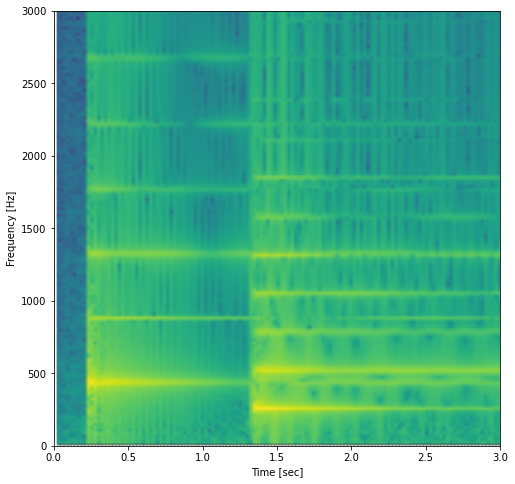

In [13]:
# replace ___ with your code

# define specifications
NOVERLAP = 1024
NFFT = 2048
WINDOW = get_window('boxcar', 2048)


# compute spectrogram
f, t, Sxx = spectrogram(x, fs ,window=WINDOW , noverlap= NOVERLAP, nfft=NFFT)

Sxx_dB = 10 * np.log10(Sxx)
# plot spectrogram
plt.pcolormesh(t, f, Sxx_dB, shading ='gouraud' )

# modify plot
plt.ylim([0,3e3])
plt.xlim([0,3])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


### Problem 3b (1P.)
Now, do it again but using the Hanning window using the function `hann`. Inspect visually and comment on what has changed?

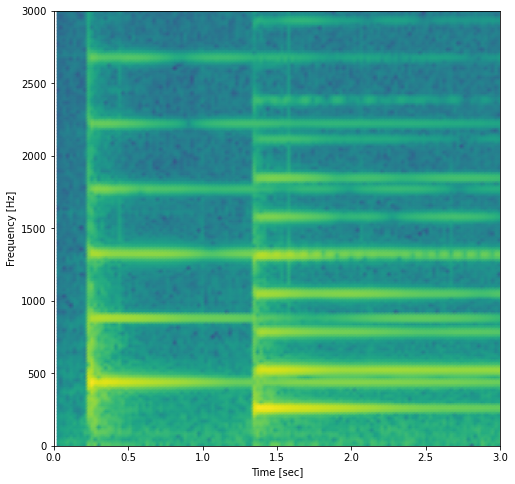

In [14]:
# replace ___ with your code

# define specifications
NOVERLAP = 1024
NFFT = 2048

# now use the hanning window
WINDOW = hann(2048)

# compute spectrogram
f, t, Sxx = spectrogram( x, fs ,window= WINDOW, noverlap= NOVERLAP ,nfft= NFFT)

Sxx_dB = 10 * np.log10(Sxx)

# plot spectrogram
plt.pcolormesh(t, f, Sxx_dB, shading='gouraud')

# modify plot
plt.ylim([0,3e3])
plt.xlim([0,3])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

#Spectrum is less blury and frequencys are more defined with the hanning window


***
## Question 4 (3P.) <a id='q4'></a>
We illustrate the trade-off between frequency and time resolution with an audio signal that is sampled at $f_s = 44100$ Hz containing sinusoidal notes of varying pitches.

### Question 4a (1P.)
Let the lowest sinusoidal be $C_0 = 16.35$Hz and the note right above it $C_0^\#=17.32$ Hz. They thus have a $\Delta f = 17.32-16.35$ Hz difference in pitch. 
* If we used $\Delta f$ as our desired frequency resolution, how long should the window length $N$ be? 
* What should the FFT window length $N_{\mathrm{FFT}}$ be? (i.e. $N_{\mathrm{FFT}}$ is the smallest power of 2 greater than $N$)

In [15]:
# replace ___ with your code

# frequencies of the two notes
C = 16.35
Csharp = 17.32

# frequency resolution
fr = Csharp - C

# sampling frequency
fs = 44100

# number of needed samples
N = fs/fr  
# FFT window length for fast computation (a power of 2)
NFFT = int(2**(np.ceil(np.log2(N))))

# print out NFFT
print('NFFT = {:}'.format(NFFT))

NFFT = 65536


### Question 4b (1P.)
* What is the time duration of the window length $N$?
* Comment on if this is feasible in an application (such as music transcription) where notes and sounds of approximately 100 ms need to be distinguished from each other?

In [16]:
# replace ___ with your code

# time corresponding to windown length N
time_s = N/fs # seconds

# print out time
print('Time duration of a window of length N is {:}'.format(time_s))

# Its not fleasable as the time 1s >> 0.1s

Time duration of a window of length N is 1.0309278350515476


### Question 4c (1P.)
If instead we choose the parameter $N$ based on the shortest note whose pitch we want to detect accurately, say 100ms, we need to consider the worst possible timing. This corresponds to placing the window exactly halfway of the duration, effectively reducing the length to 50ms.
* What would the frequency resolution $\Delta f$ be if the length is set to 50ms?
* Also comment on the downside of this approach.

In [17]:
# replace ___ with your code

# time resolution
tr = 0.05 # seconds

# how many samples does 0.05 seconds correspond to

Ntr = tr*fs

# frequency resolution
fr = fs/Ntr

# print out frequency resolution
print('frequency resolution = {:.2f}'.format(fr))

frequency resolution = 20.00


***
## Question 5 (3P.) <a id='q5'></a>
In this problem you will use Python to compute the signal and noise powers of noisy ECG signal. Assume that the noise is additive, i.e., the noisy signal at time instant $n$ is modelled as

$$x(n) = s(n) + v(n)$$
 
where $s(n)$ is the clean signal and $v(n)$ is zero mean white noise with standard deviation $\sigma_v$ (variance being $\sigma_v^2$).
You are given both the  noisy and a clean (true) cardiac signal which you can load to your workspace using the code below. 

In [18]:
ts = 0.001 # sampling interval (in seconds)
fs = 1/ts  # sampling frequency
sd = 0.5   # noise standard deviation
x  = np.loadtxt('cardiac_noisy.txt') # noisy signal = clean signal + noise
s  = np.loadtxt('cardiac_true.txt') # clean signal
tn = np.arange(len(x))*ts # sampling instants

### Question 5a (1P.) 
Plot the true and the noisy cardiac signals in time domain **in the same figure**. Plot time series only from time `[0,3]` s.

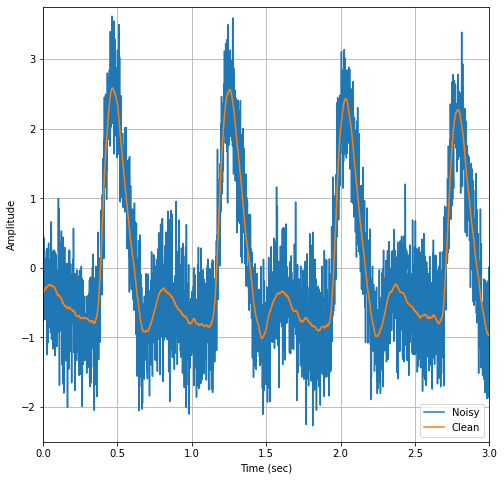

In [19]:
# replace ___ with your code



# plot the noisy signal x
plt.plot(tn,x)

# plot the clean signal  
plt.plot(tn, s)

# zoom into the 3 first seconds
plt.xlim([0,3])

# further modifications on the plot
plt.xlabel('Time (sec)'); 
plt.ylabel('Amplitude')
plt.legend(['Noisy', 'Clean'])
plt.ylim([-2.5, 3.75])
plt.grid()
plt.show()

### Question 5b (1P.) 
* Estimate the standard deviation $\sigma_v$ of the noise using the measured noisy and noiseless cardiac signals using the  root mean square (RMS) of $\{v(n)\}_{n=0}^{N-1}$ (where $v(n)=x(n)-s(n))$, 
$$\hat\sigma_{v} = \sqrt{ \frac 1 N \sum_{n=0}^{N-1} \big(x(n) -s(n)\big)^2}. $$
* Also estimate the noise power in dB.

**Note:** recall from lecture notes that you can also compute the RMS in the frequency domain due to Parseval's theorem

In [20]:
from math import sqrt
# replace ___ with your code

v =  x-s # noise
sd_v = sqrt(1/len(tn)*sum((v)**2)) # estimated standard deviation of noise

# print out the results
print('Estimated noise is {:.4f} and noise power (in dB) = {:.3f}'.format(sd_v,20*np.log10(sd_v)))

Estimated noise is 0.4955 and noise power (in dB) = -6.099


### Question 5c (1P.) 
Compute the signal-to-noise ratio (SNR) of the (noisy) cardiac signal in decibels, i.e., $10\log_{10}(\hat \sigma_s^2/\hat\sigma^2_v)$, where $\hat \sigma_s$ is the root-mean-square (RMS) of the signal $s(n)$.

In [21]:
# replace ___ with your code

sd_s = sqrt(1/len(tn)*sum((s)**2)) # standard deviation of signal
SNRx = 10*np.log10(sd_s**2/sd_v**2) # SNR


# print out result
print(f'SNR of noisy cardiac signal (in dB) = {SNRx:.3f}')

SNR of noisy cardiac signal (in dB) = 5.596


***
## Question 6 (6P.) <a id='q6'></a>
If the noise in the data is mostly concentrated on certain frequencies, we can filter the noise out from the signal. In this problem, we will apply *low-pass filtering* to the (noisy) ECG signal. We also have the true signal without the noise in file `cardiac_true.txt`. 

First load the data to the workspace as shown below. 

In [22]:
ts = 0.001 # sampling interval (in seconds)
fs = 1/ts  # sampling frequency = 1000Hz
sd = 0.5   # noise standard deviation
x  = np.loadtxt('cardiac_noisy.txt') # noisy signal = clean signal + noise
s  = np.loadtxt('cardiac_true.txt') # clean signal
tn = np.arange(len(x))*ts # sampling instants

### Question 6a (1P.) 
Design a low-pass butterworth filter of order 4 with cutoff frequency 2 Hz as in lecture notes to obtain the filter coefficients $\mathbf{a}$ and $\mathbf{b}$. Use the variable names:
* `fc` : cutoff frequency
* `fn` : normalized frequency
* `a,b` : filter coefficients $\mathbf{a}$ and $\mathbf{b}$

In [23]:
# your code
from scipy.signal import butter
fc = 2 #hz
fn = fc/(fs/2)
b,a = butter(4, fn, "lowpass")

### Question 6b (1P.) 
Use the `freqz` command to obtain the frequency response `h` and frequency vector `f`. Plot the magnitude of the frequency response as a function of frequency (as in lecture notes). Limit the range to `[0,10]` Hz.

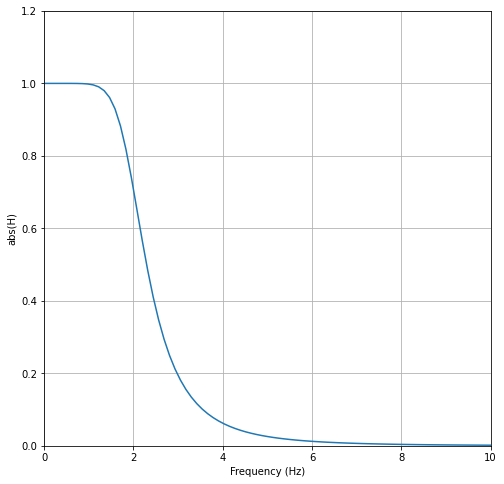

In [24]:
# replace ___ with your code

# obtain frequency response h and frequency vector f
f,h = freqz(b, a,fs=fs ,  worN=4096);

# plot magnitude response
plt.plot(f,abs(h))

# set x limit
plt.xlim((0,10))

# set y label 'abs(H)' and xlabel 'Frequency (Hz)'
plt.ylabel('abs(H)')
plt.xlabel('Frequency (Hz)')


# additional plot properties
plt.ylim([0, 1.2])
plt.grid()
plt.show()

### Question 6c (1P.) 
* Compute the filtered signal using the constructed filter (Note: you must use `filtfilt` to produce the filtered signal $y(n)$)  
* Plot the first 10 seconds of the true signal and the filtered signal on the same plot. Use different colors for the filtered signal and for the true signal. 

**Note:** Unlike the `filter` command, `filtfilt` produces zero phase distortion, ensuring accurate timing in relation to the original signal. This will be especially important later as the two signals are compared.

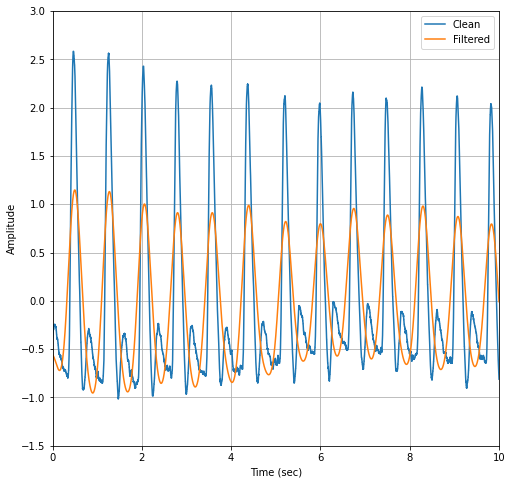

In [25]:
# replace ___ with your code

yfilt2 = filtfilt(b,a,x)


# plot the signals s and yfilt2
plt.plot(tn,s,tn,yfilt2)

# set x limits
plt.xlim((0,10))

# additional plot properties
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(['Clean', 'Filtered'])
plt.ylim([-1.5,3])
plt.show()

### Question 6d (1P.) 
Filter the noisy cardiac signal with a butterworth filter of order 4 but now using cutoff frequency 4 Hz (instead of 2 Hz as earlier). Again plot the first 10 seconds of the true signal and the  filtered signal on the same plot. 

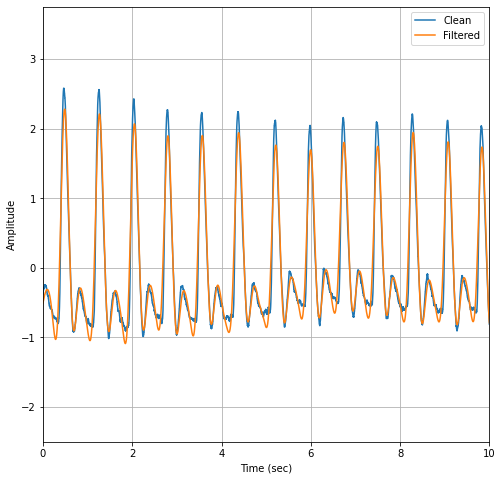

In [26]:
# replace ___ with your code

# set cutoff frequency
fc_6d= 4 #cutoff frequency

# compute filter coefficients

fn_6d = fc_6d/(fs/2)
b_6d,a_6d = butter(4, fn_6d, "lowpass")

# filter signal using filtfilt
yfilt4 = filtfilt(b_6d,a_6d,x)

# plot the signals s and yfilt4
plt.plot(tn,s,tn,yfilt4)


# set x limit
plt.xlim((0,10))

# set xlabel 'Time (sec)' and ylabel 'Amplitude'
# set legend 'Clean' and 'Filtered'"
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(['Clean', 'Filtered'])

# additional plot properties
plt.ylim([-2.5, 3.75])
plt.grid()
plt.show()

## Question 6e (1P.) 
Compute the root mean squared error (RMS) between the filtered signal and the clean signal for both cutoff frequencies (2 Hz and 4 Hz). Compare the two RMS values and **explain why one performed better than the other**.

In [27]:
# replace ___ with your code

# create a function for computing the RMS
def rms(signal):
    return np.sqrt(1/len(signal)*sum(signal**2))

# your code
s_rms = rms(s)
yfilt2_rms = rms(yfilt2-s)
yfilt4_rms = rms(yfilt4-s)


# print out the results
print("RMS for signal which is filtered with cutoff 2 Hz {:.2f}".format(yfilt2_rms))
print("RMS for signal which is filtered with cutoff 4 Hz {:.2f}".format(yfilt4_rms))
#The more you

RMS for signal which is filtered with cutoff 2 Hz 0.65
RMS for signal which is filtered with cutoff 4 Hz 0.20


### Question 6f (1P.) 
Calculate the improvement in signal-to-noise ratio (SNR) due to filtering with the 4 Hz cutoff filter compared to the **unfiltered signal**. Return the value in dB.

In [28]:
# replace ___ with your code
noise_6f = rms(x) # (noise + signal) - signal



SNRfilt4 = 10*np.log10(s_rms/rms(yfilt4-s)); # filtered
SNRx = 10*np.log10( s_rms/rms(x-s) );# unfiltered

# print out improvement
print('The improvement in SNR by filtering is = {:.3f} dB'.format(SNRfilt4-SNRx))

The improvement in SNR by filtering is = 3.845 dB


***
## Question 7 (2P.) <a id='q7'></a>
In this problem, you will apply **band-pass filtering** to a music signal.  You are given an audio recording of a song `noisysong.wav` which has an unwanted high-energy constant tone in it.

In [29]:
from scipy.io import wavfile
#import sounddevice as sd
fs, x = wavfile.read('noisysong.wav')
x = x-np.mean(x) # remove DC
x = x/max(x)
#sd.play(x,fs) # warning, loud!

### Question 7a (1P.)
Find the frequency of this annoying constant tone by using any of the techniques given in previous exercises. Find the exact frequency in Hz and store it in the variable `f_annoying`.

**Hint:** you can use commands such as `np.argmax` to find the largest value and index in a vector.

noise frequency at 2431.9816176748477 Hz


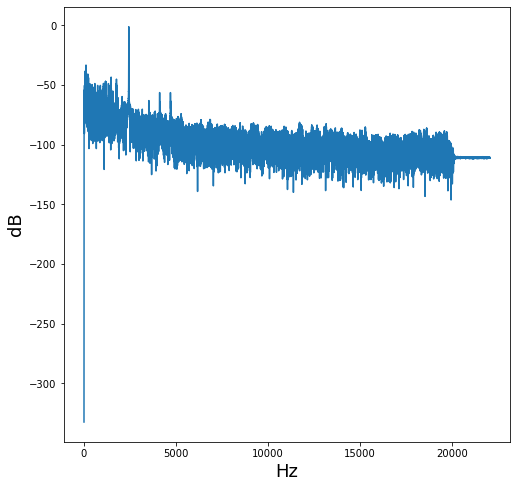

In [30]:
# your code here
#gör pånytt
f_vec_7a, PSD_7a = periodogram(x, fs)

index = np.argmax(PSD_7a)
f_annoying = f_vec_7a.tolist()[index]
# compute peridogram (f1 is the frequency vector and the PSD)

# compute the PSD in decibels (use np.log10)
PSD_7a_dB = 10*np.log10(PSD_7a)


plt.xlabel('Hz', fontsize=18)
plt.ylabel('dB', fontsize=18)


plt.plot(f_vec_7a , PSD_7a_dB)



# print out the frequency
print(f"noise frequency at {f_annoying} Hz")

### Question 7b (2P.)
Try recovering the recording: 
* Eliminate this noise using a 3rd order bandstop butterworth filter. Use a bandwidth of 400Hz.
* Plot the frequency response of your filter, i.e., the magnitude of the frequency response as a function of frequency. Remember to always add the x and y labels.

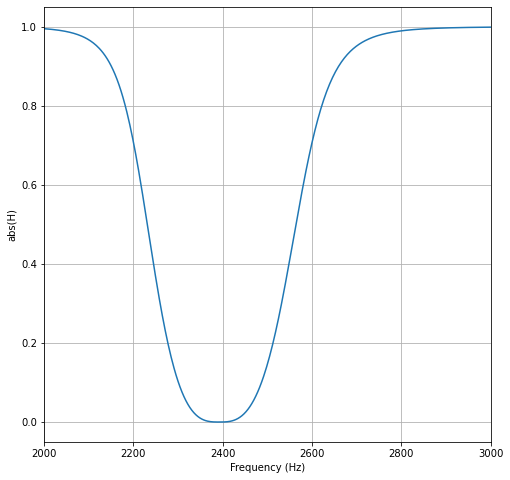

In [31]:
from scipy.signal import lfilter
# your code

# your code
# your code
from scipy.signal import butter

fc_7 = np.array([2200,2600]) #hz
fn_7 = fc_7/(fs/2) #
b_7,a_7 = butter(3, fn_7,btype='bandstop')

yfilt7 = filtfilt(b_7,a_7,x)


f_7,h_7 = freqz(b_7, a_7,fs=fs ,  worN=10000);

# plot magnitude response
plt.plot(f_7,abs(h_7))
plt.xlim(2000,3000)

# set y label 'abs(H)' and xlabel 'Frequency (Hz)'

plt.xlabel('Frequency (Hz)')
plt.ylabel('abs(H)')

# additional plot properties

plt.grid()
plt.show()
